# Just a neural network in Pytorch and tensorflow

<!--<badge>--><a href="https://colab.research.google.com/github/kuennethgroup/ml_in_ms_st25/blob/main/09_ex/my_first_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->

In [1]:
import os

# Disable CUDA
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

## Pytorch

In [2]:
from torch import nn


# Define model
class MyNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),  # Input, Output
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


device = "cpu"
model = MyNeuralNetwork().to(device)
print(model)

MyNeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


## Tensorflow

### Easy

In [3]:
import tensorflow as tf

inputs = tf.keras.Input(shape=(28 * 28,))
x = tf.keras.layers.Dense(10, activation="relu")(inputs)
x = tf.keras.layers.Dense(10, activation="relu")(x)
x = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs, x)
model
print(model.summary())

2025-07-09 11:13:20.190959: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752052400.205440 1663403 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752052400.210230 1663403 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-09 11:13:20.229429: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-07-09 11:13:22.949491: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,971 (31.14 KB)

 Trainable params: 7,971 (31.14 KB)

 Non-trainable params: 0 (0.00 B)

None


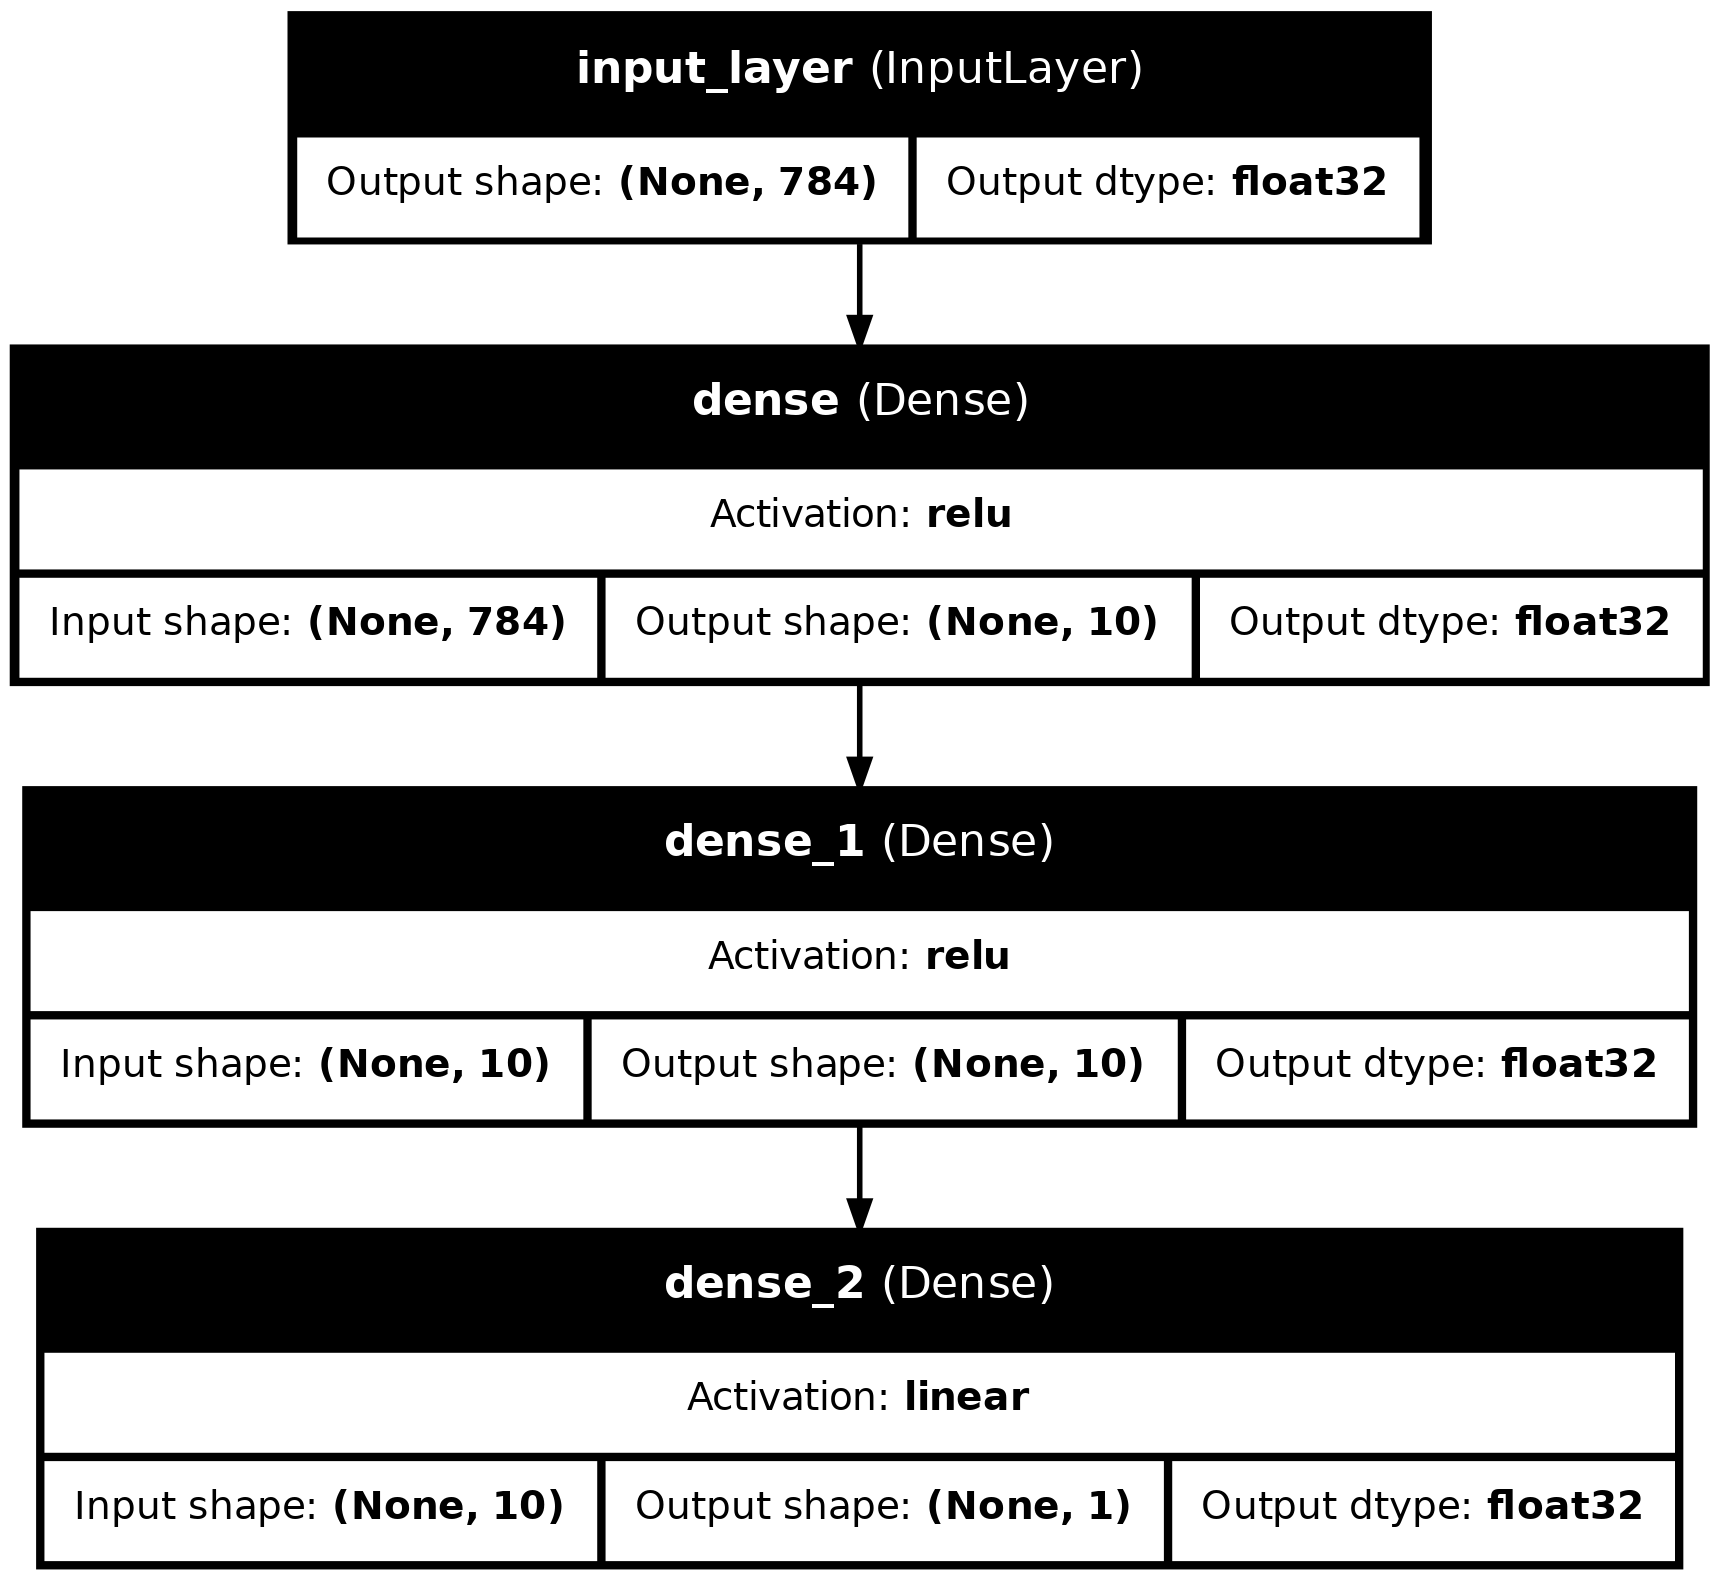

In [4]:
import keras

keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    show_layer_activations=True,
    expand_nested=True,
)

## Tensorflow using class inheritance

In [5]:
import tensorflow as tf
import numpy as np


# Define model
class MyNeuralNetwork(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.flatten = tf.keras.layers.Flatten()

        self.l1 = tf.keras.layers.Dense(512, activation="relu")
        self.l2 = tf.keras.layers.Dense(512, activation="relu")
        self.l3 = tf.keras.layers.Dense(10)

    def call(self, x):
        x = self.flatten(x)
        x = self.l1(x)
        x = self.l2(x)
        x = self.l3(x)
        return x


# Create model and print summary
model = MyNeuralNetwork()

model.compile(
    loss=tf.keras.losses.MSE,
    optimizer="adam",
)


inp = tf.keras.Input(shape=[28 * 28])
model(inp)
print(model.summary())
model

Model: "my_neural_network"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

None


<MyNeuralNetwork name=my_neural_network, built=True>

# Exercise

1. Go through the code. Use any LLM to add comments to the code to understand each line.
2. Enhance both the PyTorch and TensorFlow models by adding a 4th dense layer with 200 neurons. Execute the code and observe the changes in the network architecture.
3. Introduce dropout layers after each dense layer, except for the final layer.
4. Replace all activation functions with the PReLU funciton.